In [82]:
# Шаг 1: Загрузка данных и подготовка данных

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# Загрузка подготовленного набора данных
dataset_path = 'dataset_2.csv'
dataset = pd.read_csv(dataset_path)

# Разделение данных на входной параметр и целевую переменную
X = dataset[['Conversion Rate']]  # Один входной параметр
y = dataset['Bounce Rate']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Шаг 2: Построение и обучение модели

In [85]:
# Обучение модели
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [86]:
# Шаг 3: Визуализация результатов

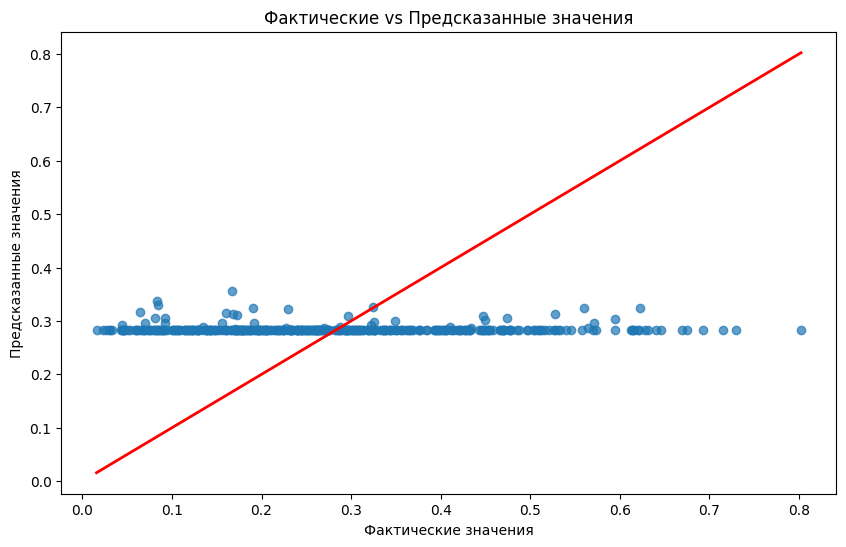

In [87]:
y_pred = model2.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.show()

In [88]:
# Шаг 4: Сохранение модели

In [89]:
joblib.dump(model2, 'model2.pkl')
print("Вторая модель успешно сохранена!")

Вторая модель успешно сохранена!


In [90]:
# Загрузка обученной модели
model2 = joblib.load('model2.pkl')

# Функция для генерации рекомендаций
def generate_recommendation(predicted_value):
    if predicted_value > 0.7:
        return "Коэффициент отказов высокий. Рекомендуется улучшить качество контента и оптимизировать пользовательский интерфейс."
    elif 0.4 < predicted_value <= 0.7:
        return "Коэффициент отказов средний. Рассмотрите возможность улучшения загрузки страниц и упрощения навигации."
    else:
        return "Коэффициент отказов низкий. Отличная работа! Продолжайте поддерживать высокий уровень взаимодействия."

# Пример тестовых данных
test_conversion_rate = [[0.65]]  # Входной параметр: нормализованное значение коэффициента конверсии

# Преобразование в DataFrame
test_data = pd.DataFrame(test_conversion_rate, columns=['Conversion Rate'])

# Получение предсказания
predicted_bounce_rate = model2.predict(test_data)[0]

# Вывод предсказания и рекомендаций
print(f"Предсказанный коэффициент отказов: {predicted_bounce_rate:.2f}")
print(f"Рекомендация: {generate_recommendation(predicted_bounce_rate)}")

Предсказанный коэффициент отказов: 0.28
Рекомендация: Коэффициент отказов низкий. Отличная работа! Продолжайте поддерживать высокий уровень взаимодействия.
